# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings,datetime,calendar
warnings.filterwarnings('ignore')

In [2]:
# List = []
# for i in tqdm(range(100000000)) : 
#     List.append(i)

# 2) Reading Data

In [3]:
data = pd.read_csv('OnlineRetail.csv')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3) Data Cleaning

In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Abnormal Values

In [8]:
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [9]:
data[data['Quantity']<=0]['Quantity'].mean()

-45.60721009036145

In [10]:
data[data['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,08-12-2011 14:06,0.0,NaN,United Kingdom


In [11]:
Wrongindices = []

Wrongindices = list(data[data['Quantity']<=0].index)
Wrongindices.extend(data[data['UnitPrice']<=0].index)
len(Wrongindices), len(set(Wrongindices))

(13141, 11805)

In [12]:
Wrongindices = list(set(Wrongindices))

In [13]:
# A = [1,2,3,4,5,6,7,8,9]  
# B = [10,12,12,13]

# A.extend(B)
# A

In [14]:
# A = [1,2,4,5,2,1,4,5]

# set(A)

In [15]:
len(Wrongindices)

11805

In [16]:
data.drop(Wrongindices,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)
data.shape

(530104, 8)

In [17]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [18]:
data[data['Quantity']>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
60250,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom
528623,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom


In [19]:
data[data['UnitPrice']>1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14715,537632,AMAZONFEE,AMAZON FEE,1,07-12-2010 15:08,13541.33,NaN,United Kingdom
40527,539856,M,Manual,1,22-12-2010 14:41,1298.40,NaN,United Kingdom
114304,546328,M,Manual,1,11-03-2011 10:19,1687.17,14911.0,EIRE
114305,546329,M,Manual,1,11-03-2011 10:22,1687.17,14911.0,EIRE
116845,546558,M,Manual,1,15-03-2011 09:50,2583.76,NaN,Hong Kong
141364,548813,M,Manual,1,04-04-2011 13:03,2382.92,12744.0,Singapore
141366,548813,M,Manual,1,04-04-2011 13:03,1252.95,12744.0,Singapore
141367,548820,M,Manual,1,04-04-2011 13:04,2053.07,12744.0,Singapore
142345,548913,M,Manual,1,05-04-2011 09:45,1136.30,12669.0,France
146920,549468,M,Manual,1,08-04-2011 14:27,1867.86,17940.0,United Kingdom


### Nulls

In [20]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [21]:
'No ID' in data['CustomerID'].tolist()

False

In [22]:
data['CustomerID'].fillna('No ID',inplace=True)
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [23]:
data['Member'] = data['CustomerID'].apply(lambda x : 0 if x =='No ID' else 1)
data['Member'].value_counts()

1    397884
0    132220
Name: Member, dtype: int64

In [24]:
Data = pd.DataFrame([[1,2,3,4],[1,2,3,4],[1,2,3,4],
                     [1,5,2,6],[1,5,2,6],[9,8,5,2]])
Data

,0,1,2,3
0,1,2,3,4
1,1,2,3,4
2,1,2,3,4
3,1,5,2,6
4,1,5,2,6
5,9,8,5,2


In [25]:
Data.duplicated()

0    False
1     True
2     True
3    False
4     True
5    False
dtype: bool

In [26]:
Data.drop_duplicates(inplace=True)
Data

,0,1,2,3
0,1,2,3,4
3,1,5,2,6
5,9,8,5,2


In [27]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
530099    False
530100    False
530101    False
530102    False
530103    False
Length: 530104, dtype: bool

In [28]:
DuplicateIndices = []
for i,row in enumerate(data.duplicated().tolist()) : 
    if row == True : DuplicateIndices.append(i)
len(DuplicateIndices)

5226

In [29]:
DuplicateIndices

[508,
 518,
 528,
 530,
 546,
 578,
 580,
 585,
 589,
 591,
 592,
 595,
 596,
 607,
 608,
 609,
 611,
 748,
 821,
 825,
 842,
 849,
 881,
 1050,
 1056,
 1129,
 1142,
 1148,
 1154,
 1155,
 1156,
 1158,
 1161,
 1168,
 1194,
 1211,
 1970,
 1983,
 1987,
 1988,
 2050,
 2071,
 2160,
 2178,
 3502,
 3514,
 3532,
 3550,
 3551,
 3556,
 3557,
 3562,
 3961,
 4078,
 4079,
 4090,
 4099,
 4102,
 4104,
 4113,
 4115,
 4549,
 4552,
 4578,
 4583,
 4584,
 4589,
 4590,
 4592,
 4593,
 4599,
 4609,
 4610,
 4614,
 4623,
 4626,
 4638,
 4667,
 4671,
 5089,
 5091,
 5120,
 5122,
 5128,
 5131,
 5368,
 5389,
 5395,
 5397,
 5399,
 5400,
 5613,
 5625,
 5634,
 5637,
 5640,
 5651,
 6341,
 6354,
 6376,
 6379,
 6715,
 7361,
 7363,
 7387,
 7419,
 7436,
 7437,
 7582,
 7584,
 7591,
 7592,
 7601,
 7736,
 7901,
 8021,
 8117,
 8158,
 8176,
 8178,
 8179,
 8180,
 8333,
 8337,
 8341,
 8477,
 8484,
 8485,
 8587,
 8601,
 8617,
 8624,
 8625,
 8626,
 8630,
 8631,
 8640,
 8691,
 8715,
 8717,
 8720,
 8722,
 8747,
 8748,
 8749,
 8751,
 

In [30]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)
data.shape

(524878, 9)

In [31]:
524878+5226

530104

# 4) Data Processing

In [32]:
def ShowDetails() : 
    global data
    for col in data.columns : 
        print(f' for feature {col}')
        print(f'Number of Unique Values {len(data[col].unique())}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print('-------------------------------------------------------')

In [33]:
ShowDetails()

 for feature InvoiceNo
Number of Unique Values 19960
 Random Value 552727
 Random Value 541285
 Random Value 566186
-------------------------------------------------------
 for feature StockCode
Number of Unique Values 3922
 Random Value 22665
 Random Value 22952
 Random Value 22507
-------------------------------------------------------
 for feature Description
Number of Unique Values 4026
 Random Value CHRISTMAS LIGHTS 10 SANTAS 
 Random Value BLUE POLKADOT GARDEN PARASOL
 Random Value PICNIC BASKET WICKER LARGE
-------------------------------------------------------
 for feature Quantity
Number of Unique Values 375
 Random Value 8
 Random Value 6
 Random Value 1
-------------------------------------------------------
 for feature InvoiceDate
Number of Unique Values 18499
 Random Value 28-04-2011 15:13
 Random Value 06-11-2011 12:04
 Random Value 21-07-2011 10:44
-------------------------------------------------------
 for feature UnitPrice
Number of Unique Values 1291
 Random Value 

In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1


In [35]:
data[data['InvoiceNo']=='536365']['InvoiceDate'].unique()

array(['01-12-2010 08:26'], dtype=object)

In [36]:
# InvoiceNumberList = []
# for i in tqdm(data['InvoiceNo'].unique()) : 
#     InvoiceNumberList.append(len(data[data['InvoiceNo']==i]['InvoiceDate'].unique()))   

In [37]:
# set(InvoiceNumberList) 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   524878 non-null  object 
 7   Country      524878 non-null  object 
 8   Member       524878 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 36.0+ MB


In [39]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format = '%d-%m-%Y %H:%M')
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
524873   2011-12-09 12:50:00
524874   2011-12-09 12:50:00
524875   2011-12-09 12:50:00
524876   2011-12-09 12:50:00
524877   2011-12-09 12:50:00
Name: InvoiceDate, Length: 524878, dtype: datetime64[ns]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  object        
 7   Country      524878 non-null  object        
 8   Member       524878 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 36.0+ MB


In [41]:
data['Quantity'].min(),data['Quantity'].max()

(1, 80995)

In [42]:
data['InvoiceDate'].min(),data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [43]:
data['InvoiceDate'].max() - data['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [44]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['WeekDayCase'] = data['WeekDay'].apply(
    lambda x : 'WeekEnd' if str(x).lower() in 
    ['saturday','sunday'] else 'WeekDay')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay


In [45]:
data['WeekDayCase'].value_counts()

WeekDay    462539
WeekEnd     62339
Name: WeekDayCase, dtype: int64

In [46]:
data['WeekDay'].value_counts()

Thursday     100213
Tuesday       98726
Monday        92466
Wednesday     91467
Friday        79667
Sunday        62339
Name: WeekDay, dtype: int64

In [47]:
def DayPart(H) :
    
    if H <6 : 
        return 'Early Morning'
    elif 6<= H< 12 : 
        return 'Morning'
    elif 12<= H< 15 : 
        return 'Noon'
    elif 15<= H< 19 : 
        return 'Evening'
    else : 
        return 'Night'

In [48]:
data['DayPart'] = data['Hour'].apply(lambda x : DayPart(int(x)))

In [49]:
data['DayPart'].value_counts()

Noon       211036
Evening    163759
Morning    145878
Night        4205
Name: DayPart, dtype: int64

In [50]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon


In [51]:
# len(set([str(i).lower for i in data['StockCode'].tolist()])) ,len(data['Description'].unique())  

In [52]:
Text = 'I love Python and hate R'
len(Text),len(Text.split())

(24, 6)

In [53]:
Text.split()

['I', 'love', 'Python', 'and', 'hate', 'R']

In [54]:
data['Desc Char Length'] = data['Description'].apply(
    lambda x :  len(x))
data['Desc Word Length'] = data['Description'].apply(
    lambda x :  len(x.split()))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5


In [55]:
data['Desc Char Length'].min(),data['Desc Char Length'].max()

(6, 35)

In [56]:
data[data['Desc Char Length']==6]['Description'].unique()

array(['Manual'], dtype=object)

In [57]:
data[data['Desc Char Length']==35]['Description'].unique()

array(['KNITTED UNION FLAG HOT WATER BOTTLE',
       'ROUND SNACK BOXES SET OF4 WOODLAND ',
       'CHARLIE & LOLA WASTEPAPER BIN FLORA',
       'CLEAR DRAWER KNOB ACRYLIC EDWARDIAN',
       'COLOUR GLASS T-LIGHT HOLDER HANGING',
       'CLASSIC METAL BIRDCAGE PLANT HOLDER',
       'FRIDGE MAGNETS LES ENFANTS ASSORTED',
       'SET/20 RED RETROSPOT PAPER NAPKINS ',
       'DISCO BALL ROTATOR BATTERY OPERATED',
       'BLUE NEW BAROQUE CANDLESTICK CANDLE',
       'GREEN DRAWER KNOB ACRYLIC EDWARDIAN',
       'SET/5 RED RETROSPOT LID GLASS BOWLS',
       'ROTATING SILVER ANGELS T-LIGHT HLDR',
       'SQUARECUSHION COVER PINK UNION FLAG',
       'SET 12 LAVENDER  BOTANICAL T-LIGHTS',
       'MAGIC DRAWING SLATE CIRCUS PARADE  ',
       'PAINTED METAL STAR WITH HOLLY BELLS',
       'PAINTED METAL HEART WITH HOLLY BELL',
       'FOLDING UMBRELLA PINKWHITE POLKADOT',
       'FOLDING UMBRELLA WHITE/RED POLKADOT',
       'FOLDING UMBRELLA RED/WHITE POLKADOT',
       'SET OF 20 VINTAGE CHRISTMA

In [58]:
data['Desc Word Length'].min(),data['Desc Word Length'].max()

(1, 8)

In [59]:
data[data['Desc Word Length']==1]['Description'].unique()

array(['POSTAGE', 'CARRIAGE', 'Manual', 'SOMBRERO ', 'SAMPLES'],
      dtype=object)

In [60]:
data[data['Desc Word Length']==8]['Description'].unique()

array(['SET OF 2 TEA TOWELS APPLE AND PEARS',
       'SET OF 6 3D KIT CARDS FOR KIDS',
       'SET OF 12 MINI BUNNIES IN A BUCKET',
       'HEN HOUSE W FAMILY IN BARN & NEST',
       'MAXWELL 2 TONE BLUE 60 PAGE PHOTO A',
       'FOOD COVER WITH BEADS , SET 2 SIZES',
       'SET OF 60 I LOVE LONDON CAKE CASES ',
       'SET 10 CARDS 12 DAYS OF XMAS 17059'], dtype=object)

In [61]:
Text = 'my name is Hesham,and I`m (ML Engineer) . . . .'
Text.split()

['my',
 'name',
 'is',
 'Hesham,and',
 'I`m',
 '(ML',
 'Engineer)',
 '.',
 '.',
 '.',
 '.']

In [62]:
Names = ['ahmed','fatma','george','sayed','husain']

' '.join(Names)

'ahmed fatma george sayed husain'

In [63]:
AllDescription = ' '.join(data['Description'].tolist())
AllDescription = ' '.join([(i).lower() 
                           for i in AllDescription.split()])
len(AllDescription)

14392144

In [64]:
len(AllDescription.split())

2303213

In [65]:
AllDescription[:1000]

"white hanging heart t-light holder white metal lantern cream cupid hearts coat hanger knitted union flag hot water bottle red woolly hottie white heart. set 7 babushka nesting boxes glass star frosted t-light holder hand warmer union jack hand warmer red polka dot assorted colour bird ornament poppy's playhouse bedroom poppy's playhouse kitchen feltcraft princess charlotte doll ivory knitted mug cosy box of 6 assorted colour teaspoons box of vintage jigsaw blocks box of vintage alphabet blocks home building block word love building block word recipe box with metal heart doormat new england jam making set with jars red coat rack paris fashion yellow coat rack paris fashion blue coat rack paris fashion bath building block word alarm clock bakelike pink alarm clock bakelike red alarm clock bakelike green panda and bunnies sticker sheet stars gift tape inflatable political globe vintage heads and tails card game set/2 red retrospot tea towels round snack boxes set of4 woodland spaceboy lu

In [66]:
MostRepeatedWords = {}

for Word in AllDescription.split() : 
    if Word in MostRepeatedWords.keys() : 
        MostRepeatedWords[Word] +=1
    else : 
        MostRepeatedWords[Word] =1
MostRepeatedWords

{'white': 20198,
 'hanging': 16452,
 'heart': 37841,
 't-light': 14063,
 'holder': 15710,
 'metal': 20396,
 'lantern': 2270,
 'cream': 7760,
 'cupid': 333,
 'hearts': 4910,
 'coat': 1570,
 'hanger': 2145,
 'knitted': 786,
 'union': 5344,
 'flag': 1745,
 'hot': 10293,
 'water': 9771,
 'bottle': 11463,
 'red': 41742,
 'woolly': 438,
 'hottie': 438,
 'heart.': 438,
 'set': 53069,
 '7': 623,
 'babushka': 3155,
 'nesting': 498,
 'boxes': 3145,
 'glass': 11527,
 'star': 5948,
 'frosted': 154,
 'hand': 4796,
 'warmer': 4479,
 'jack': 3723,
 'polka': 194,
 'dot': 107,
 'assorted': 7359,
 'colour': 6040,
 'bird': 5743,
 'ornament': 1476,
 "poppy's": 1422,
 'playhouse': 1422,
 'bedroom': 425,
 'kitchen': 3455,
 'feltcraft': 7041,
 'princess': 1164,
 'charlotte': 6213,
 'doll': 2183,
 'ivory': 7943,
 'mug': 7917,
 'cosy': 1276,
 'box': 23554,
 'of': 52015,
 '6': 12865,
 'teaspoons': 210,
 'vintage': 32964,
 'jigsaw': 1623,
 'blocks': 502,
 'alphabet': 3830,
 'home': 9275,
 'building': 1686,
 'blo

In [68]:
len(MostRepeatedWords.keys())

2351

In [69]:
MostRepeatedWords=  {k:v for k,v in sorted(
    MostRepeatedWords.items(),key = lambda
    item: item[1],reverse = True) }
MostRepeatedWords

{'set': 53069,
 'of': 52015,
 'bag': 50823,
 'red': 41742,
 'heart': 37841,
 'retrospot': 34124,
 'vintage': 32964,
 'design': 29200,
 'pink': 28869,
 'christmas': 24587,
 'box': 23554,
 'jumbo': 20724,
 'cake': 20681,
 'metal': 20396,
 'white': 20198,
 'blue': 18804,
 'lunch': 18007,
 '3': 17893,
 'sign': 16677,
 'hanging': 16452,
 'holder': 15710,
 'pack': 15319,
 'paper': 14135,
 't-light': 14063,
 'small': 13945,
 'card': 13058,
 '6': 12865,
 'decoration': 12716,
 'wooden': 12435,
 'polkadot': 12228,
 'cases': 11721,
 'glass': 11527,
 'tea': 11519,
 'bottle': 11463,
 '12': 11191,
 'in': 10959,
 'and': 10606,
 'spaceboy': 10570,
 'hot': 10293,
 'water': 9771,
 'with': 9519,
 'large': 9428,
 'pantry': 9403,
 'home': 9275,
 'tin': 9191,
 'rose': 9163,
 'paisley': 9149,
 '4': 8925,
 'green': 8865,
 'ceramic': 8757,
 'regency': 8613,
 'doormat': 8255,
 'dolly': 8221,
 'mini': 7970,
 'ivory': 7943,
 'mug': 7917,
 'bunting': 7881,
 'love': 7793,
 'cream': 7760,
 'girl': 7601,
 'party': 74

In [70]:
ImportantWords = ['bag','red','heart','retrospot',
                  'vintage','design','pink','christmas',
                  'box','kitchen'] 

In [ ]:
# GuessedWords  = ['car','electric','kitchen','electronic']

# for Word in GuessedWords : 
#     if Word in MostRepeatedWords.keys():
#         print(f'for Word {Word} repeated {MostRepeatedWords[Word]}')

In [71]:
for Word in ImportantWords : 
    data[f'Repeated Word : {Word}'] = data['Description'].apply(lambda x : 1 if Word in x.lower() else 0)

In [72]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0


In [73]:
data[data['Repeated Word : red']==1]['Description']

4           RED WOOLLY HOTTIE WHITE HEART.
8                HAND WARMER RED POLKA DOT
22             RED COAT RACK PARIS FASHION
27               ALARM CLOCK BAKELIKE RED 
33         SET/2 RED RETROSPOT TEA TOWELS 
                        ...               
524836    RED FLOCK LOVE HEART PHOTO FRAME
524849           ALARM CLOCK BAKELIKE RED 
524861       RED RETROSPOT ROUND CAKE TINS
524862               DOORMAT RED RETROSPOT
524867           ALARM CLOCK BAKELIKE RED 
Name: Description, Length: 44727, dtype: object

In [74]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [75]:
data['Country'].replace('Israel','Palestine',inplace=True)
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Palestine', 'Greece', 'Hong Kong',
       'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [76]:
ContinentsDict = {'Europe':['United Kingdom','France','Netherlands','Germany','Norway'
                            ,'EIRE','Switzerland','Spain', 'Poland', 'Portugal','Italy'
                            ,'Belgium','Lithuania','Iceland','Channel Islands','Denmark'
                            ,'Cyprus','Sweden','Finland','Austria','Greece','Czech Republic'
                            ,'European Community','Malta'],
              'Asia':['Japan','Bahrain','Palestine','Hong Kong','Singapore','Lebanon',
                      'United Arab Emirates','Saudi Arabia'],
              'Americans':['Canada',  'Brazil', 'USA'],
              'Other':['Australia','Unspecified','RSA']}
ContinentsDict

{'Europe': ['United Kingdom',
  'France',
  'Netherlands',
  'Germany',
  'Norway',
  'EIRE',
  'Switzerland',
  'Spain',
  'Poland',
  'Portugal',
  'Italy',
  'Belgium',
  'Lithuania',
  'Iceland',
  'Channel Islands',
  'Denmark',
  'Cyprus',
  'Sweden',
  'Finland',
  'Austria',
  'Greece',
  'Czech Republic',
  'European Community',
  'Malta'],
 'Asia': ['Japan',
  'Bahrain',
  'Palestine',
  'Hong Kong',
  'Singapore',
  'Lebanon',
  'United Arab Emirates',
  'Saudi Arabia'],
 'Americans': ['Canada', 'Brazil', 'USA'],
 'Other': ['Australia', 'Unspecified', 'RSA']}

In [77]:
def GetContinent(Country) : 
    global ContinentsDict
    for Key in ContinentsDict.keys() : 
        if Country in ContinentsDict[Key] : 
            return Key
    
data['Continent'] = data['Country'].apply(lambda x: GetContinent(x))

In [78]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe


In [79]:
for Continent in ContinentsDict.keys() : 
    Countries = ContinentsDict[Continent]
    print(f'for Continent {Continent} , Countries are : {Countries}')
    for Country in Countries : 
        print(data[data['Country']==Country]['Continent'].unique())
    print('=========================================')

for Continent Europe , Countries are : ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Czech Republic', 'European Community', 'Malta']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
['Europe']
for Continent Asia , Countries are : ['Japan', 'Bahrain', 'Palestine', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia']
['Asia']
['Asia']
['Asia']
['Asia']
['Asia']
['Asia']
['Asia']
['Asia']
for Continent Americans , Countries are : ['Canada', 'Brazil', 'USA']
['Americans']
['Americans']
['Americans']
for Continent Other , Countries are : ['Australia', 'Unspecified', 'RSA

In [ ]:
# pip install geopy

In [81]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="catuserbot")
def GeoLocate(country):
    try:
        loc = geolocator.geocode(country)
        return (loc.latitude, loc.longitude)
    except:
        return np.nan

In [82]:
GeoLocate('paris')

(48.8588897, 2.3200410217200766)

In [83]:
GeoLocate('washington')

(38.8950368, -77.0365427)

In [87]:
GeoLocate('egypt')

(26.2540493, 29.2675469)

In [ ]:
data['Country'].unique()

In [ ]:
# pip install countryinfo

In [88]:
from countryinfo import CountryInfo

In [89]:
CountryInfo('France').capital()

'Paris'

In [90]:
CapitalsDict = {}

for Country in data['Country'].unique() : 
    try : 
        CapitalsDict[Country] = CountryInfo(Country).capital()
    except :
        print(Country)
CapitalsDict    

EIRE
Channel Islands
Palestine
Unspecified
European Community


{'United Kingdom': 'London',
 'France': 'Paris',
 'Australia': 'Canberra',
 'Netherlands': 'Amsterdam',
 'Germany': 'Berlin',
 'Norway': 'Oslo',
 'Switzerland': 'Bern',
 'Spain': 'Madrid',
 'Poland': 'Warsaw',
 'Portugal': 'Lisbon',
 'Italy': 'Rome',
 'Belgium': 'Brussels',
 'Lithuania': 'Vilnius',
 'Japan': 'Tokyo',
 'Iceland': 'Reykjavik',
 'Denmark': 'Copenhagen',
 'Cyprus': 'Nicosia',
 'Sweden': 'Stockholm',
 'Finland': 'Helsinki',
 'Austria': 'Vienna',
 'Bahrain': 'Manama',
 'Greece': 'Athens',
 'Hong Kong': 'City of Victoria',
 'Singapore': 'Singapore',
 'Lebanon': 'Beirut',
 'United Arab Emirates': 'Abu Dhabi',
 'Saudi Arabia': 'Riyadh',
 'Czech Republic': 'Prague',
 'Canada': 'Ottawa',
 'Brazil': 'Brasília',
 'USA': 'Washington D.C.',
 'Malta': 'Valletta',
 'RSA': 'Pretoria'}

In [91]:
CapitalsDict['EIRE'] = 'Dublin'
CapitalsDict['Channel Islands'] = 'Peter Port'
CapitalsDict['Palestine'] = 'Quds'
CapitalsDict

{'United Kingdom': 'London',
 'France': 'Paris',
 'Australia': 'Canberra',
 'Netherlands': 'Amsterdam',
 'Germany': 'Berlin',
 'Norway': 'Oslo',
 'Switzerland': 'Bern',
 'Spain': 'Madrid',
 'Poland': 'Warsaw',
 'Portugal': 'Lisbon',
 'Italy': 'Rome',
 'Belgium': 'Brussels',
 'Lithuania': 'Vilnius',
 'Japan': 'Tokyo',
 'Iceland': 'Reykjavik',
 'Denmark': 'Copenhagen',
 'Cyprus': 'Nicosia',
 'Sweden': 'Stockholm',
 'Finland': 'Helsinki',
 'Austria': 'Vienna',
 'Bahrain': 'Manama',
 'Greece': 'Athens',
 'Hong Kong': 'City of Victoria',
 'Singapore': 'Singapore',
 'Lebanon': 'Beirut',
 'United Arab Emirates': 'Abu Dhabi',
 'Saudi Arabia': 'Riyadh',
 'Czech Republic': 'Prague',
 'Canada': 'Ottawa',
 'Brazil': 'Brasília',
 'USA': 'Washington D.C.',
 'Malta': 'Valletta',
 'RSA': 'Pretoria',
 'EIRE': 'Dublin',
 'Channel Islands': 'Peter Port',
 'Palestine': 'Quds'}

In [92]:
LocationDict = {}
for Country in CapitalsDict.keys() : 
    a,b = GeoLocate(CapitalsDict[Country])
    LocationDict[Country] = [a,b]
LocationDict    


{'United Kingdom': [51.5073219, -0.1276474],
 'France': [48.8588897, 2.3200410217200766],
 'Australia': [-35.2975906, 149.1012676],
 'Netherlands': [52.3727598, 4.8936041],
 'Germany': [52.5170365, 13.3888599],
 'Norway': [59.9133301, 10.7389701],
 'Switzerland': [46.9482713, 7.4514512],
 'Spain': [40.4167047, -3.7035825],
 'Poland': [52.2319581, 21.0067249],
 'Portugal': [38.7077507, -9.1365919],
 'Italy': [41.8933203, 12.4829321],
 'Belgium': [50.8465573, 4.351697],
 'Lithuania': [54.6870458, 25.2829111],
 'Japan': [35.6828387, 139.7594549],
 'Iceland': [64.145981, -21.9422367],
 'Denmark': [55.6867243, 12.5700724],
 'Cyprus': [35.1748976, 33.3638568],
 'Sweden': [59.3251172, 18.0710935],
 'Finland': [60.1674881, 24.9427473],
 'Austria': [48.2083537, 16.3725042],
 'Bahrain': [26.2235041, 50.5822436],
 'Greece': [37.9839412, 23.7283052],
 'Hong Kong': [22.27658545, 114.1692984339808],
 'Singapore': [1.357107, 103.8194992],
 'Lebanon': [33.8959203, 35.47843],
 'United Arab Emirates': [

In [93]:
len(data['Country'].unique()),len(list(LocationDict.keys()))

(38, 36)

In [94]:
[i for i in data['Country'].unique() if not i in LocationDict.keys()]

['Unspecified', 'European Community']

In [95]:
LocationDict['Unspecified'] = [0,0]
LocationDict['European Community'] = [51.5073219, -0.1276474]

LocationDict

{'United Kingdom': [51.5073219, -0.1276474],
 'France': [48.8588897, 2.3200410217200766],
 'Australia': [-35.2975906, 149.1012676],
 'Netherlands': [52.3727598, 4.8936041],
 'Germany': [52.5170365, 13.3888599],
 'Norway': [59.9133301, 10.7389701],
 'Switzerland': [46.9482713, 7.4514512],
 'Spain': [40.4167047, -3.7035825],
 'Poland': [52.2319581, 21.0067249],
 'Portugal': [38.7077507, -9.1365919],
 'Italy': [41.8933203, 12.4829321],
 'Belgium': [50.8465573, 4.351697],
 'Lithuania': [54.6870458, 25.2829111],
 'Japan': [35.6828387, 139.7594549],
 'Iceland': [64.145981, -21.9422367],
 'Denmark': [55.6867243, 12.5700724],
 'Cyprus': [35.1748976, 33.3638568],
 'Sweden': [59.3251172, 18.0710935],
 'Finland': [60.1674881, 24.9427473],
 'Austria': [48.2083537, 16.3725042],
 'Bahrain': [26.2235041, 50.5822436],
 'Greece': [37.9839412, 23.7283052],
 'Hong Kong': [22.27658545, 114.1692984339808],
 'Singapore': [1.357107, 103.8194992],
 'Lebanon': [33.8959203, 35.47843],
 'United Arab Emirates': [

In [96]:
data['Latt'] = data['Country'].apply(lambda x : LocationDict[x][0])
data['Long'] = data['Country'].apply(lambda x : LocationDict[x][1])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041


In [ ]:
# data['a'] = data['b'].apply(lambda x : x)

In [97]:
data['TotalPrice'] = data.apply(lambda x : x['Quantity'] * x['UnitPrice'],axis=1)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,10.20
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,12.60
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60


In [98]:
data['TotalPrice'].min(),data['TotalPrice'].max()

(0.001, 168469.6)

In [99]:
data['Quantity'].min(),data['Quantity'].max()

(1, 80995)

In [100]:
def QuantityLevel(x) : 
    x = int(x)
    if x < 10 : 
        return 'Low'
    elif  x < 100 : 
        return 'Medium'
    else :
        return 'Huge'
data['Quantity Level'] =data['Quantity'] .apply(lambda x : QuantityLevel(x))
data['Quantity Level'].value_counts()

Low       370741
Medium    147485
Huge        6652
Name: Quantity Level, dtype: int64

In [101]:
data['UnitPrice'].min(),data['UnitPrice'].max()

(0.001, 13541.33)

In [102]:
def UnitPriceLevel(x) : 
    x = int(x)
    if x < 1 : 
        return 'Cheap'
    elif  x <10 : 
        return 'Medium'
    else :
        return 'Expensive'
data['UnitPrice Level'] =data['UnitPrice'] .apply(lambda x : UnitPriceLevel(x))
data['UnitPrice Level'].value_counts()

Medium       391399
Cheap        109584
Expensive     23895
Name: UnitPrice Level, dtype: int64

In [103]:
data['TotalPrice'].min(),data['TotalPrice'].max()

(0.001, 168469.6)

In [104]:
def TotalPriceLevel(x) : 
    x = int(x)
    if x < 5 : 
        return 'Cheap'
    elif 5<= x <20 : 
        return 'Medium'
    else :
        return 'Expensive'
data['TotalPriceLevel'] =data['TotalPrice'] .apply(lambda x : TotalPriceLevel(x))
data['TotalPriceLevel'].value_counts()

Medium       253145
Cheap        170809
Expensive    100924
Name: TotalPriceLevel, dtype: int64

In [105]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,12.60,Low,Medium,Medium
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium


In [106]:
data[data['InvoiceNo']=='536365']['StockCode'].unique()

array(['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730'],
      dtype=object)

In [107]:
for i in data['InvoiceNo'].unique()[:10] : 
    print(f'for invoice number {i}')
    print(data[data['InvoiceNo']==i]['StockCode'].unique())
    print('--------------------------------------------------------')

for invoice number 536365
['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730']
--------------------------------------------------------
for invoice number 536366
['22633' '22632']
--------------------------------------------------------
for invoice number 536367
['84879' '22745' '22748' '22749' '22310' '84969' '22623' '22622' '21754'
 '21755' '21777' '48187']
--------------------------------------------------------
for invoice number 536368
['22960' '22913' '22912' '22914']
--------------------------------------------------------
for invoice number 536369
['21756']
--------------------------------------------------------
for invoice number 536370
['22728' '22727' '22726' '21724' '21883' '10002' '21791' '21035' '22326'
 '22629' '22659' '22631' '22661' '21731' '22900' '21913' '22540' '22544'
 '22492' 'POST']
--------------------------------------------------------
for invoice number 536371
['22086']
--------------------------------------------------------
for invoice number 5363

In [109]:
data['StockCode'].unique()[:20]

array(['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730',
       '22633', '22632', '84879', '22745', '22748', '22749', '22310',
       '84969', '22623', '22622', '21754', '21755', '21777'], dtype=object)

In [111]:
import re

In [112]:
re.sub("\d+", "", 'abcd1234')

'abcd'

In [ ]:
data['StockCode'].unique()

In [113]:
data['StockCodeLetters'] = data['StockCode'].apply(lambda x :
                                                   re.sub("\d+", "", x).lower())
data['StockCodeLetters'].unique()

array(['a', '', 'b', 'g', 'e', 'post', 'l', 'c', 's', 'bl', 'n', 'd', 'f',
       't', 'h', 'm', 'p', 'j', 'r', 'dot', 'k', 'v', 'w', 'bank charges',
       'i', 'y', 'u', 'amazonfee', 'z', 'o', 'dcgs', 'gift__', 'dcgssboy',
       'dcgssgirl', 'pads'], dtype=object)

In [114]:
data['StockCodeLetters'].value_counts()

                472253
b                13751
a                12813
c                 6601
d                 3703
l                 2315
e                 2231
f                 1946
s                 1708
g                 1516
post              1126
m                  755
p                  751
dot                706
n                  686
k                  427
bl                 383
h                  375
j                  219
w                  179
u                  164
r                   90
v                   48
gift__              31
t                   15
i                   13
dcgssgirl           13
bank charges        12
dcgssboy            11
z                   10
dcgs                 9
y                    8
o                    5
pads                 3
amazonfee            2
Name: StockCodeLetters, dtype: int64

In [115]:
data['StockCodeOnlyDigits'] = data['StockCodeLetters'].apply(lambda x :'Yes' if x =='' else 'No')
data['StockCodeOnlyDigits'].value_counts()

Yes    472253
No      52625
Name: StockCodeOnlyDigits, dtype: int64

In [116]:
data['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [117]:
SeasonsDict = {'Winter':[12,1,2],'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11]}


data['Season'] = data['Month'].apply(lambda x : [i for i in list(SeasonsDict.keys()) if int(x) in SeasonsDict[i]][0])
data['Season'].value_counts()

Fall      189441
Winter    126766
Summer    108375
Spring    100296
Name: Season, dtype: int64

In [118]:
data[data['Season']=='Fall']['Month'].unique()

array([ 9, 10, 11], dtype=int64)

In [119]:
data[data['Season']=='Summer']['Month'].unique()

array([6, 7, 8], dtype=int64)

In [120]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium,,Yes,Winter
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,12.60,Low,Medium,Medium,,Yes,Winter
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter


In [121]:
data['WeekEnd Case'] = data['WeekDay'].apply(
    lambda x : 'WeekEnd' if x in ['Sunday','Sunday'] else 'WeekDay')
data['WeekEnd Case'].value_counts()

WeekDay    462539
WeekEnd     62339
Name: WeekEnd Case, dtype: int64

In [122]:
data[data['WeekEnd Case']=='WeekEnd']['WeekDay'].unique()

array(['Sunday'], dtype=object)

In [123]:
data[data['WeekEnd Case']=='WeekDay']['WeekDay'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype=object)

In [124]:
data['WeekDay'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

# 5 ) Data Visualization

In [126]:
def CPlot(data,feature) : 
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),
                  linewidth=5,edgecolor=sns.color_palette("dark", 3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

def KPlot(data,feature,Limit=0) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if Limit == 0 : 
        sns.kdeplot(data[feature], shade=True)
    else : 
        Data = data[data[feature]<=Limit]
        sns.kdeplot(Data[feature], shade=True)
def BPlot(data,feature1,feature2 = None,hue = None) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
        
def JPlot(data,feature1,feature2,Type = 'scatter') : 
    sns.jointplot(data=data, x=feature1, y=feature2, kind=Type)   
    
    
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()     

In [131]:
Data = data[::100]
Data.shape,data.shape

((5249, 39), (524878, 39))

In [132]:
Data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay
100,536378,84519A,TOMATO CHARLIE+LOLA COASTER SET,6,2010-12-01 09:37:00,2.95,14688.0,United Kingdom,1,2010,12,1,9,Wednesday,WeekDay,Morning,31,4,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,17.70,Low,Medium,Medium,a,No,Winter,WeekDay
200,536389,85014B,RED RETROSPOT UMBRELLA,6,2010-12-01 10:03:00,5.95,12431.0,Australia,1,2010,12,1,10,Wednesday,WeekDay,Morning,22,3,0,1,0,1,0,0,0,0,0,0,Other,-35.297591,149.101268,35.70,Low,Medium,Expensive,b,No,Winter,WeekDay
300,536398,22449,SILK PURSE BABUSHKA PINK,6,2010-12-01 10:52:00,3.35,13448.0,United Kingdom,1,2010,12,1,10,Wednesday,WeekDay,Morning,24,4,0,0,0,0,0,0,1,0,0,0,Europe,51.507322,-0.127647,20.10,Low,Medium,Expensive,,Yes,Winter,WeekDay
400,536404,84992,72 SWEETHEART FAIRY CAKE CASES,24,2010-12-01 11:29:00,0.55,16218.0,United Kingdom,1,2010,12,1,11,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,13.20,Medium,Cheap,Medium,,Yes,Winter,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524400,581498,22384,LUNCH BAG PINK POLKADOT,1,2011-12-09 10:26:00,4.96,No ID,United Kingdom,0,2011,12,9,10,Friday,WeekDay,Morning,23,4,1,0,0,0,0,0,1,0,0,0,Europe,51.507322,-0.127647,4.96,Low,Medium,Cheap,,Yes,Winter,WeekDay
524500,581498,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2011-12-09 10:26:00,8.29,No ID,United Kingdom,0,2011,12,9,10,Friday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,33.16,Low,Medium,Expensive,e,No,Winter,WeekDay
524600,581516,23355,HOT WATER BOTTLE KEEP CALM,8,2011-12-09 11:26:00,4.95,14422.0,United Kingdom,1,2011,12,9,11,Friday,WeekDay,Morning,26,5,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,39.60,Low,Medium,Expensive,,Yes,Winter,WeekDay
524700,581571,23326,HANGING MINI COLOURED BOTTLES,6,2011-12-09 12:00:00,0.63,15311.0,United Kingdom,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,1,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,3.78,Low,Cheap,Cheap,,Yes,Winter,WeekDay


In [133]:
Data = data.sample(frac = 0.01)
Data.shape,data.shape

((5249, 39), (524878, 39))

In [134]:
Data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
430041,574721,21253,SET OF PICTURE FRAME STICKERS,1,2011-11-06 14:43:00,2.95,17920.0,United Kingdom,1,2011,11,6,14,Sunday,WeekEnd,Noon,30,5,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,2.95,Low,Medium,Cheap,,Yes,Fall,WeekEnd
342124,567742,22961,JAM MAKING SET PRINTED,12,2011-09-22 10:47:00,1.45,14261.0,United Kingdom,1,2011,9,22,10,Thursday,WeekDay,Morning,22,4,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,17.40,Medium,Medium,Medium,,Yes,Fall,WeekDay
468934,577527,22271,FELTCRAFT DOLL ROSIE,3,2011-11-20 13:40:00,2.95,17523.0,United Kingdom,1,2011,11,20,13,Sunday,WeekEnd,Noon,20,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,8.85,Low,Medium,Medium,,Yes,Fall,WeekEnd
427265,574561,23221,REINDEER HEART DECORATION SILVER,1,2011-11-04 15:52:00,1.63,No ID,United Kingdom,0,2011,11,4,15,Friday,WeekDay,Evening,32,4,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,1.63,Low,Medium,Cheap,,Yes,Fall,WeekDay
433684,574967,22688,DOORMAT PEACE ON EARTH BLUE,1,2011-11-08 10:51:00,16.63,No ID,United Kingdom,0,2011,11,8,10,Tuesday,WeekDay,Morning,27,5,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,16.63,Low,Expensive,Medium,,Yes,Fall,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350033,568332,21175,GIN + TONIC DIET METAL SIGN,12,2011-09-26 14:30:00,2.55,13434.0,United Kingdom,1,2011,9,26,14,Monday,WeekDay,Noon,27,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,30.60,Medium,Medium,Expensive,,Yes,Fall,WeekDay
28440,538801,21109,LARGE CAKE TOWEL CHOCOLATE SPOTS,24,2010-12-14 11:51:00,1.95,16083.0,United Kingdom,1,2010,12,14,11,Tuesday,WeekDay,Morning,32,5,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,46.80,Medium,Medium,Expensive,,Yes,Winter,WeekDay
221869,557026,23307,SET OF 60 PANTRY DESIGN CAKE CASES,24,2011-06-16 13:14:00,0.55,16571.0,United Kingdom,1,2011,6,16,13,Thursday,WeekDay,Noon,35,7,0,0,0,0,0,1,0,0,0,0,Europe,51.507322,-0.127647,13.20,Medium,Cheap,Medium,,Yes,Summer,WeekDay
132212,547967,22722,SET OF 6 SPICE TINS PANTRY DESIGN,1,2011-03-28 15:49:00,8.29,No ID,United Kingdom,0,2011,3,28,15,Monday,WeekDay,Evening,33,7,0,0,0,0,0,1,0,0,0,0,Europe,51.507322,-0.127647,8.29,Low,Medium,Medium,,Yes,Spring,WeekDay


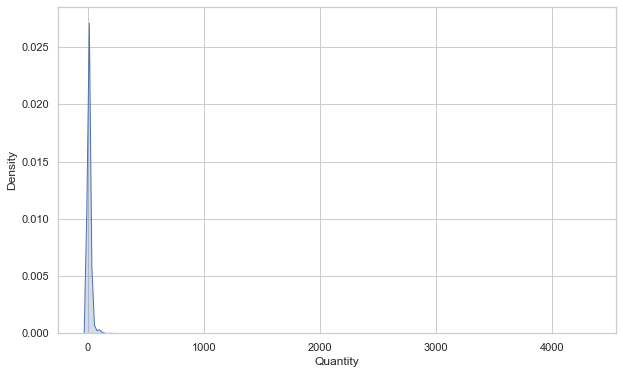

In [135]:
KPlot(Data,'Quantity')

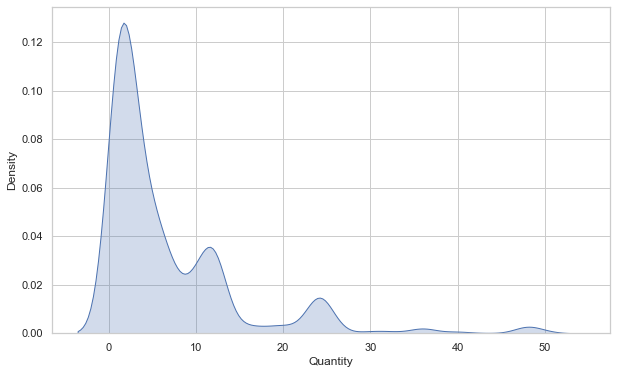

In [137]:
KPlot(Data,'Quantity',50)

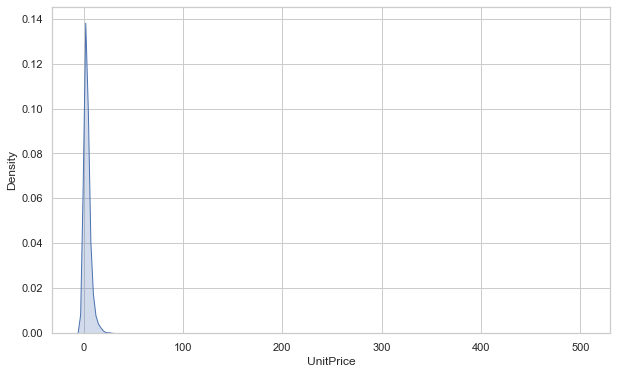

In [138]:
KPlot(Data,'UnitPrice')

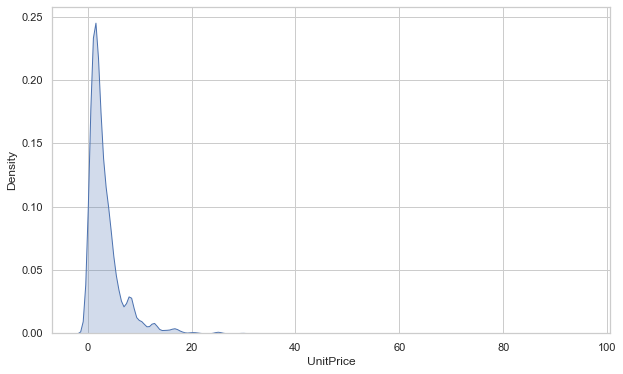

In [139]:
KPlot(Data,'UnitPrice',100)

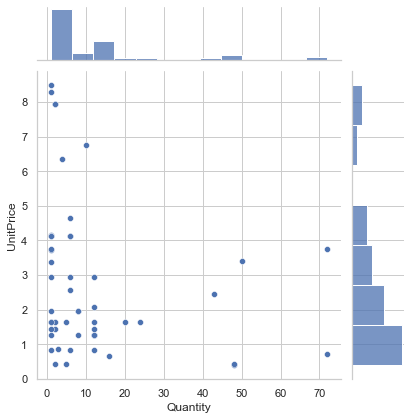

In [140]:
JPlot(Data[::100] ,'Quantity','UnitPrice')

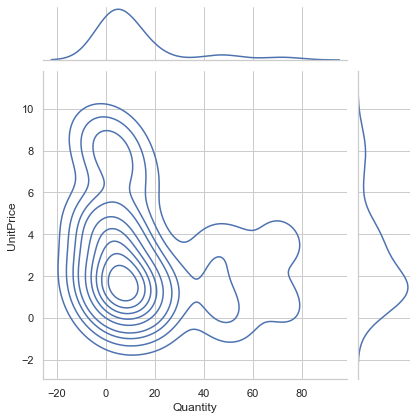

In [141]:
JPlot(Data[::100] ,'Quantity','UnitPrice','kde')

In [ ]:
data

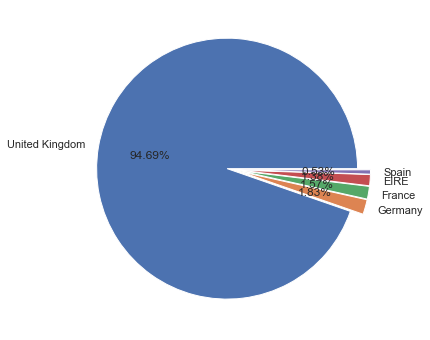

In [142]:
Pie(Data,'Country',5)

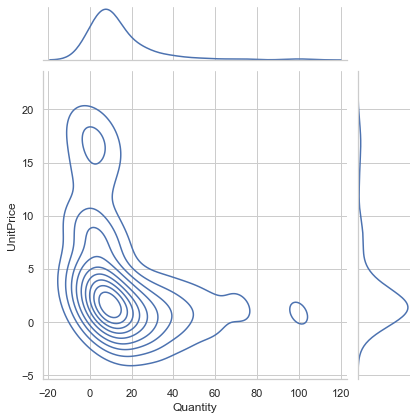

In [143]:
JPlot(Data[Data['Country']=='France'] ,'Quantity','UnitPrice','kde')

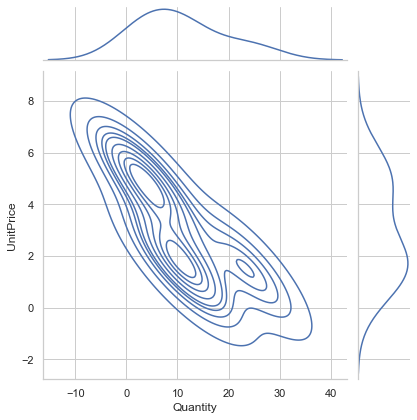

In [144]:
JPlot(Data[Data['Country']=='Italy'] ,'Quantity','UnitPrice','kde')


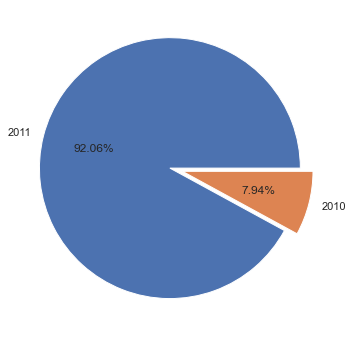

In [145]:
Pie(Data,'Year')

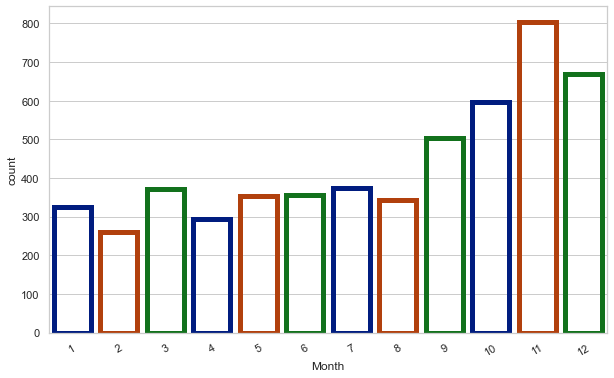

In [146]:
CPlot(Data,'Month')

In [ ]:
data

In [147]:
data['YearMonth'] = data.apply(lambda x : str(x['Year']) + str(x['Month']),axis=1)
data['YearMonth'].unique()

array(['201012', '20111', '20112', '20113', '20114', '20115', '20116',
       '20117', '20118', '20119', '201110', '201111', '201112'],
      dtype=object)

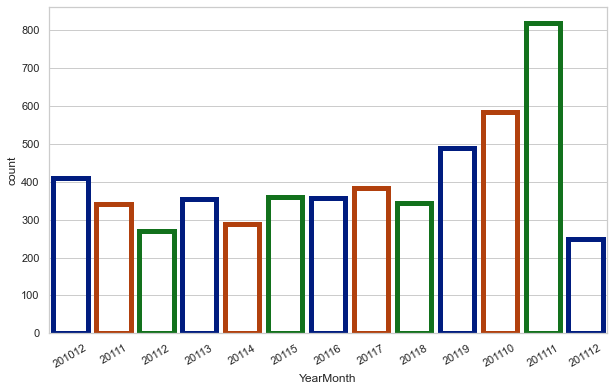

In [148]:
CPlot(data[::100],'YearMonth')

In [149]:
data.drop(['YearMonth'],axis=1,inplace=True)


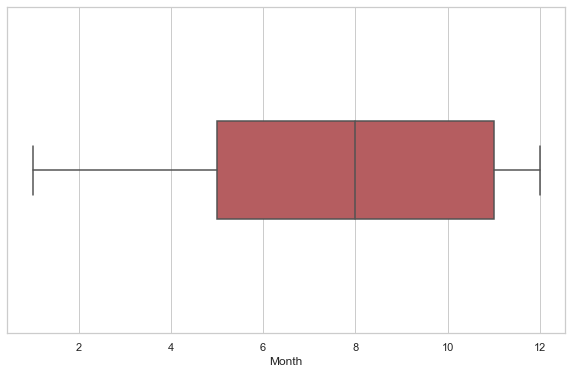

In [150]:
BPlot(Data,'Month')

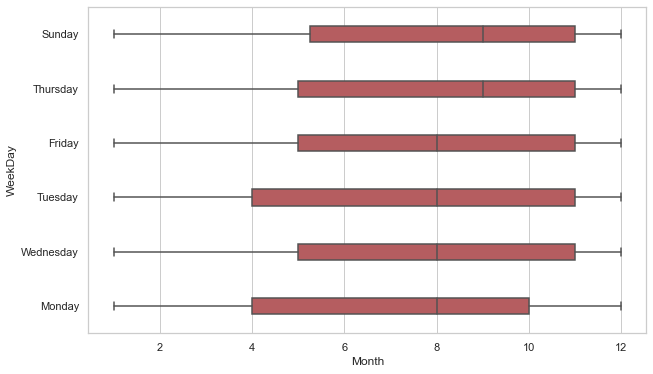

In [151]:
BPlot(Data,'Month','WeekDay')

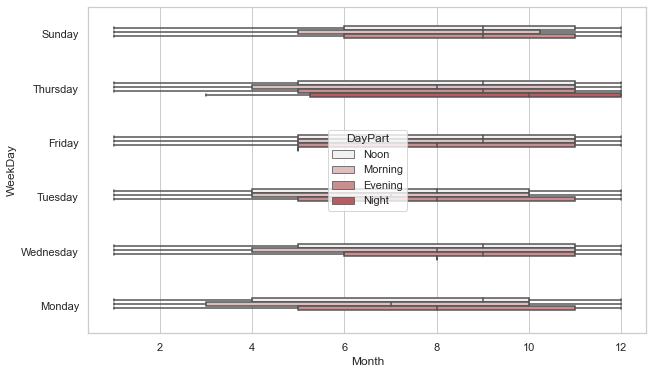

In [152]:
BPlot(Data,'Month','WeekDay','DayPart')

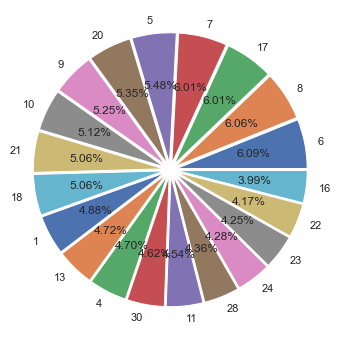

In [153]:
Pie(Data,'Day')

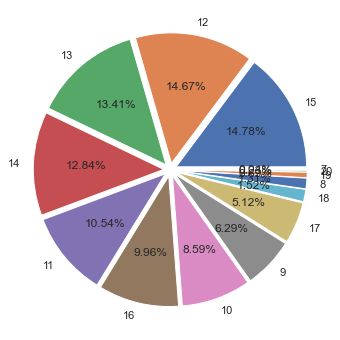

In [154]:
Pie(Data,'Hour')

In [155]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium,,Yes,Winter,WeekDay
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,12.60,Low,Medium,Medium,,Yes,Winter,WeekDay
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay


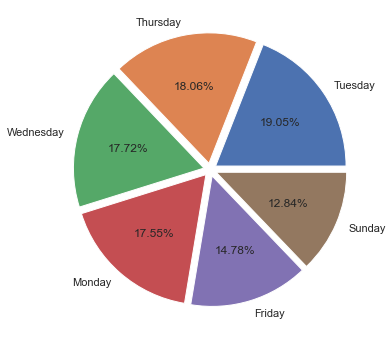

In [156]:
Pie(Data,'WeekDay')

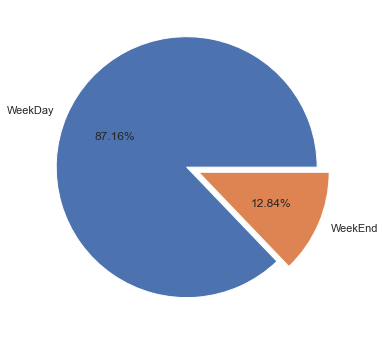

In [157]:
Pie(Data,'WeekEnd Case')

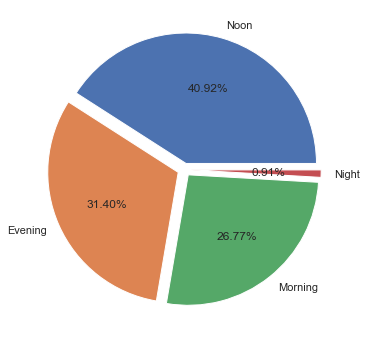

In [158]:
Pie(Data,'DayPart')


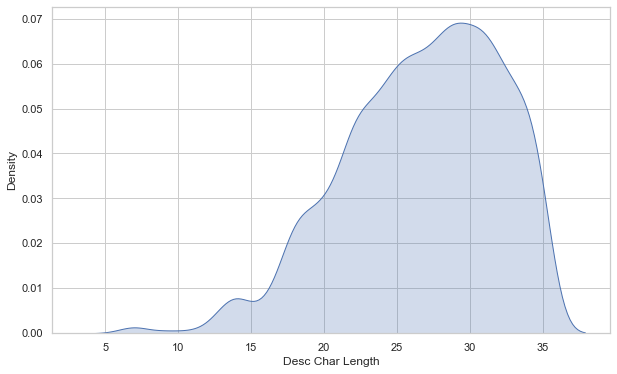

In [159]:
KPlot(Data,'Desc Char Length')

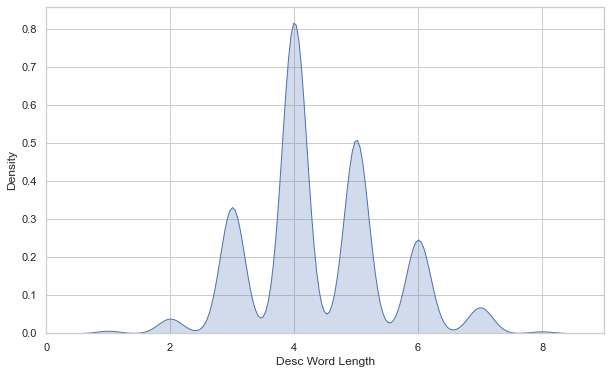

In [160]:
KPlot(Data,'Desc Word Length')

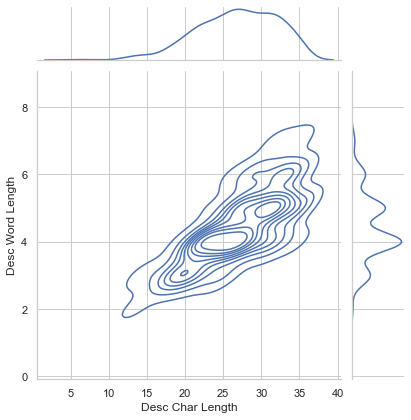

In [161]:
JPlot(Data[::10],'Desc Char Length','Desc Word Length','kde')

In [162]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay


In [163]:
WordFeaturesList = [c for c in data.columns if 'Word' in c]
WordFeaturesList


['Desc Word Length',
 'Repeated Word : bag',
 'Repeated Word : red',
 'Repeated Word : heart',
 'Repeated Word : retrospot',
 'Repeated Word : vintage',
 'Repeated Word : design',
 'Repeated Word : pink',
 'Repeated Word : christmas',
 'Repeated Word : box',
 'Repeated Word : kitchen']

In [164]:
WordFeaturesList.remove('Desc Word Length')
WordFeaturesList

['Repeated Word : bag',
 'Repeated Word : red',
 'Repeated Word : heart',
 'Repeated Word : retrospot',
 'Repeated Word : vintage',
 'Repeated Word : design',
 'Repeated Word : pink',
 'Repeated Word : christmas',
 'Repeated Word : box',
 'Repeated Word : kitchen']

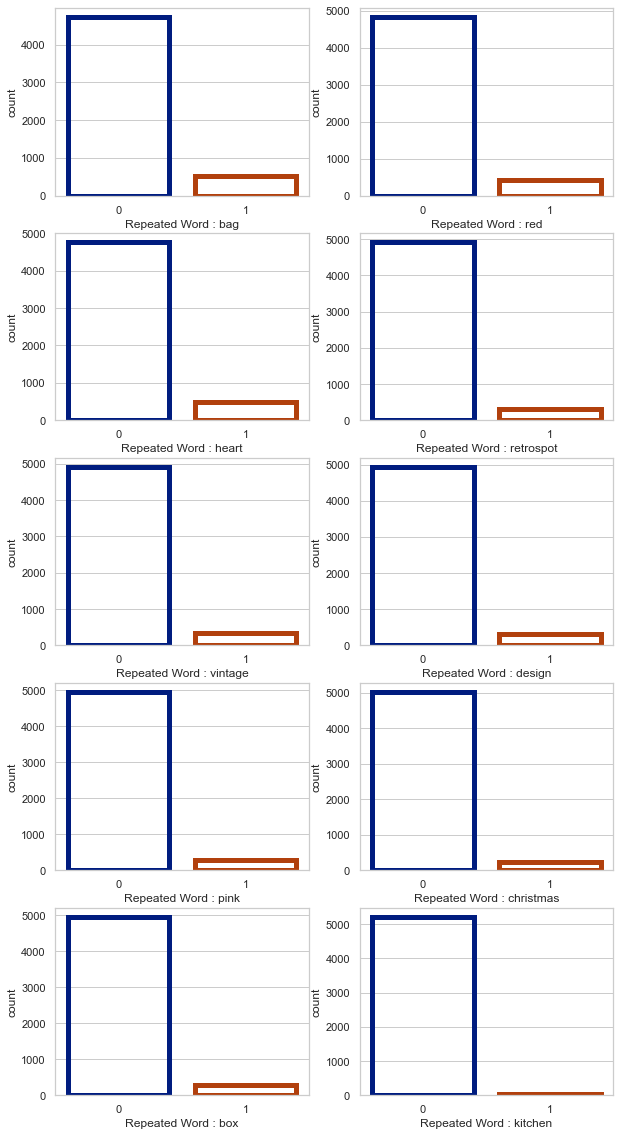

In [165]:
fig, ax = plt.subplots(figsize=(10,20))
for N in range(10) : 
    N+=1
    plt.subplot(5,2,N)
    sns.countplot(x=WordFeaturesList[N-1], data=Data,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

In [169]:
data[WordFeaturesList].sum().values

array([51929, 44727, 47452, 34124, 32970, 29753, 29664, 24588, 27433,
        3455], dtype=int64)

In [170]:
WordExistNumbers = list(data[WordFeaturesList].sum().values)
WordExistNumbers

[51929, 44727, 47452, 34124, 32970, 29753, 29664, 24588, 27433, 3455]

In [171]:
WordExistRatios = [np.round(100*i/data.shape[0],2) for i in WordExistNumbers]
WordExistNumbers,WordExistRatios
# for a,b in zip(data[WordFeaturesList].sum().index,data[WordFeaturesList].sum().values) : 
#     print(a,b)

([51929, 44727, 47452, 34124, 32970, 29753, 29664, 24588, 27433, 3455],
 [9.89, 8.52, 9.04, 6.5, 6.28, 5.67, 5.65, 4.68, 5.23, 0.66])

In [172]:
ThisData = pd.DataFrame([WordExistRatios,WordFeaturesList],index =['Percentage','Words']).T
ThisData

,Percentage,Words
0,9.89,Repeated Word : bag
1,8.52,Repeated Word : red
2,9.04,Repeated Word : heart
3,6.5,Repeated Word : retrospot
4,6.28,Repeated Word : vintage
5,5.67,Repeated Word : design
6,5.65,Repeated Word : pink
7,4.68,Repeated Word : christmas
8,5.23,Repeated Word : box
9,0.66,Repeated Word : kitchen


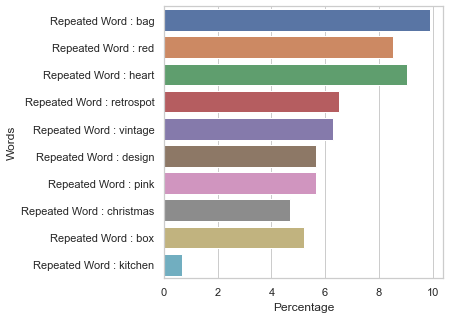

In [173]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x="Percentage", y="Words", data=ThisData)

In [ ]:
# pip install folium

In [174]:
import folium
from folium.plugins import MarkerCluster

In [181]:
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
for i in tqdm(range(0,data.shape[0],50)):
        lat = data.iloc[i]['Latt']
        long = data.iloc[i]['Long']
        radius=5
        popup_text = "Country : {}<br> With Quantity : {}<br>"
        popup_text = popup_text.format(data.iloc[i]['Country'],data.iloc[i]['Quantity'])
        folium.CircleMarker(
            location = [lat, long], radius=radius,popup= popup_text,fill =True).add_to(marker_cluster)
world_map

In [ ]:
data

In [ ]:
Pie(Data,'Continent')

In [ ]:
Pie(Data,'Quantity Level')

In [ ]:
CPlot(Data,'UnitPrice Level')

In [ ]:
Pie(Data,'TotalPriceLevel')

In [ ]:
CPlot(Data,'StockCodeLetters')

In [ ]:
CPlot(Data[Data['StockCodeLetters']!=''],'StockCodeLetters')

In [ ]:
Pie(Data,'StockCodeOnlyDigits')

In [ ]:
CPlot(Data,'Season')

In [ ]:
Pie(Data,'WeekEnd Case')

In [176]:
def SelectedFeaturePie(data,feature,Limit=10) : 
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,4,1)
    plt.title('Summer')
    Data = data[data['Season']=='Summer']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,4,2)
    plt.title('Fall')
    Data = data[data['Season']=='Fall']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,4,3)
    plt.title('Winter')
    Data = data[data['Season']=='Winter']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,4,4)
    plt.title('Spring')
    Data = data[data['Season']=='Spring']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.show()     


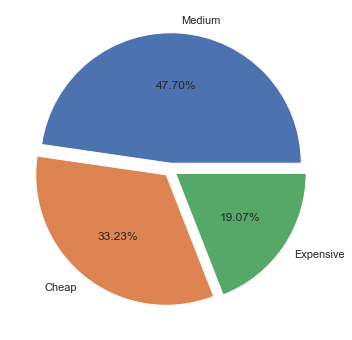

In [177]:
Pie(Data,'TotalPriceLevel')

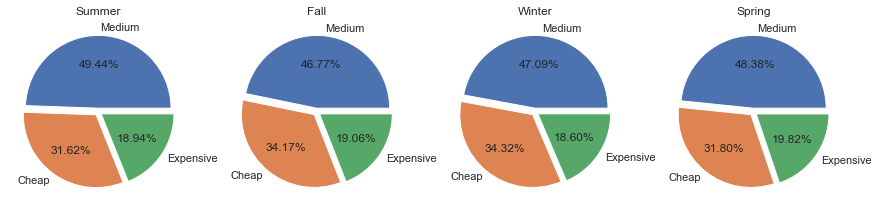

In [178]:
SelectedFeaturePie(Data,'TotalPriceLevel')

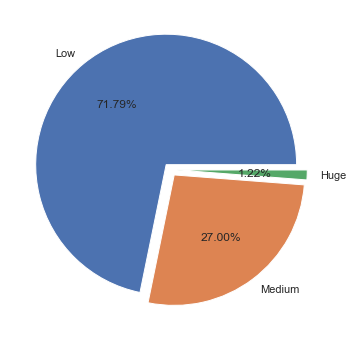

In [179]:
Pie(Data,'Quantity Level')

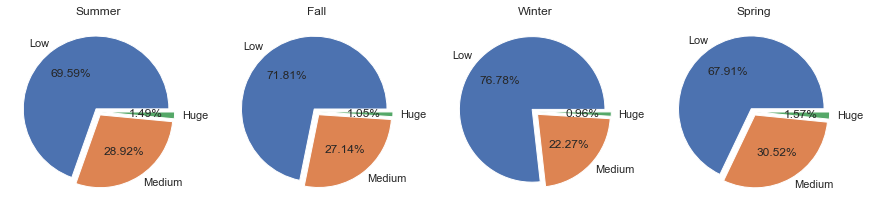

In [180]:
SelectedFeaturePie(Data,'Quantity Level')

# 6) Data Preparing

In [182]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay


In [183]:
data.shape

(524878, 39)

In [184]:
EncodedFeatures = ['Country','WeekDay','WeekDayCase','DayPart','Continent',
                   'Quantity Level','UnitPrice Level','TotalPriceLevel',
                   'StockCodeLetters','StockCodeOnlyDigits','Season','WeekEnd Case']

In [185]:
data[EncodedFeatures]

,Country,WeekDay,WeekDayCase,DayPart,Continent,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
0,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Medium,a,No,Winter,WeekDay
1,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,,Yes,Winter,WeekDay
2,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,b,No,Winter,WeekDay
3,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,g,No,Winter,WeekDay
4,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,e,No,Winter,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...
524873,France,Friday,WeekDay,Noon,Europe,Medium,Cheap,Medium,,Yes,Winter,WeekDay
524874,France,Friday,WeekDay,Noon,Europe,Low,Medium,Medium,,Yes,Winter,WeekDay
524875,France,Friday,WeekDay,Noon,Europe,Low,Medium,Medium,,Yes,Winter,WeekDay
524876,France,Friday,WeekDay,Noon,Europe,Low,Medium,Medium,,Yes,Winter,WeekDay


In [186]:
data.isna().sum()

InvoiceNo                    0
StockCode                    0
Description                  0
Quantity                     0
InvoiceDate                  0
UnitPrice                    0
CustomerID                   0
Country                      0
Member                       0
Year                         0
Month                        0
Day                          0
Hour                         0
WeekDay                      0
WeekDayCase                  0
DayPart                      0
Desc Char Length             0
Desc Word Length             0
Repeated Word : bag          0
Repeated Word : red          0
Repeated Word : heart        0
Repeated Word : retrospot    0
Repeated Word : vintage      0
Repeated Word : design       0
Repeated Word : pink         0
Repeated Word : christmas    0
Repeated Word : box          0
Repeated Word : kitchen      0
Continent                    0
Latt                         0
Long                         0
TotalPrice                   0
Quantity

In [187]:
def ApplyEncoder(OriginalColumn) : 
    global data
    Encoder = LabelEncoder()
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [ ]:
# M = 10

In [ ]:
# del M

In [ ]:
# M

In [188]:
for Col in EncodedFeatures : 
    data[f'Enc_{Col}'] = ApplyEncoder(Col)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay,36,5,0,1,2,1,2,2,1,0,3,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay,36,5,0,1,2,1,2,1,0,1,3,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay,36,5,0,1,2,1,2,1,3,0,3,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay,36,5,0,1,2,1,2,1,14,0,3,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay,36,5,0,1,2,1,2,1,12,0,3,0


In [189]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Member', 'Year', 'Month', 'Day',
       'Hour', 'WeekDay', 'WeekDayCase', 'DayPart', 'Desc Char Length',
       'Desc Word Length', 'Repeated Word : bag', 'Repeated Word : red',
       'Repeated Word : heart', 'Repeated Word : retrospot',
       'Repeated Word : vintage', 'Repeated Word : design',
       'Repeated Word : pink', 'Repeated Word : christmas',
       'Repeated Word : box', 'Repeated Word : kitchen', 'Continent', 'Latt',
       'Long', 'TotalPrice', 'Quantity Level', 'UnitPrice Level',
       'TotalPriceLevel', 'StockCodeLetters', 'StockCodeOnlyDigits', 'Season',
       'WeekEnd Case', 'Enc_Country', 'Enc_WeekDay', 'Enc_WeekDayCase',
       'Enc_DayPart', 'Enc_Continent', 'Enc_Quantity Level',
       'Enc_UnitPrice Level', 'Enc_TotalPriceLevel', 'Enc_StockCodeLetters',
       'Enc_StockCodeOnlyDigits', 'Enc_Season', 'Enc_WeekEnd Case'],
      dtype='objec

In [191]:
X = data[['Quantity','UnitPrice','CustomerID','Member','Year','Month','Day','Hour','Desc Char Length','Desc Word Length',
     'Repeated Word : bag','Repeated Word : red','Repeated Word : heart','Repeated Word : retrospot','Repeated Word : vintage',
     'Repeated Word : design','Repeated Word : pink','Repeated Word : christmas','Repeated Word : box','Repeated Word : kitchen',
     'TotalPrice','Enc_Country', 'Enc_WeekDay', 'Enc_WeekDayCase','Enc_DayPart','Enc_Continent','Enc_Quantity Level','Enc_UnitPrice Level',
     'Enc_TotalPriceLevel', 'Enc_StockCodeLetters','Enc_StockCodeOnlyDigits', 'Enc_Season', 'Enc_WeekEnd Case']]

In [192]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Quantity                   524878 non-null  int64  
 1   UnitPrice                  524878 non-null  float64
 2   CustomerID                 524878 non-null  object 
 3   Member                     524878 non-null  int64  
 4   Year                       524878 non-null  int64  
 5   Month                      524878 non-null  int64  
 6   Day                        524878 non-null  int64  
 7   Hour                       524878 non-null  int64  
 8   Desc Char Length           524878 non-null  int64  
 9   Desc Word Length           524878 non-null  int64  
 10  Repeated Word : bag        524878 non-null  int64  
 11  Repeated Word : red        524878 non-null  int64  
 12  Repeated Word : heart      524878 non-null  int64  
 13  Repeated Word : retrospot  52

In [193]:
data['CustomerID'].value_counts()

No ID      132186
17841.0      7676
14911.0      5670
14096.0      5111
12748.0      4412
            ...  
13703.0         1
13747.0         1
17347.0         1
17331.0         1
12346.0         1
Name: CustomerID, Length: 4339, dtype: int64

In [194]:
data['CustomerID'].replace('No ID',0,inplace=True)

In [195]:
X = data[['Quantity','UnitPrice','CustomerID','Member','Year','Month','Day','Hour','Desc Char Length','Desc Word Length',
     'Repeated Word : bag','Repeated Word : red','Repeated Word : heart','Repeated Word : retrospot','Repeated Word : vintage',
     'Repeated Word : design','Repeated Word : pink','Repeated Word : christmas','Repeated Word : box','Repeated Word : kitchen',
     'TotalPrice','Enc_Country', 'Enc_WeekDay', 'Enc_WeekDayCase','Enc_DayPart','Enc_Continent','Enc_Quantity Level','Enc_UnitPrice Level',
     'Enc_TotalPriceLevel', 'Enc_StockCodeLetters','Enc_StockCodeOnlyDigits', 'Enc_Season', 'Enc_WeekEnd Case']]

In [196]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Quantity                   524878 non-null  int64  
 1   UnitPrice                  524878 non-null  float64
 2   CustomerID                 524878 non-null  float64
 3   Member                     524878 non-null  int64  
 4   Year                       524878 non-null  int64  
 5   Month                      524878 non-null  int64  
 6   Day                        524878 non-null  int64  
 7   Hour                       524878 non-null  int64  
 8   Desc Char Length           524878 non-null  int64  
 9   Desc Word Length           524878 non-null  int64  
 10  Repeated Word : bag        524878 non-null  int64  
 11  Repeated Word : red        524878 non-null  int64  
 12  Repeated Word : heart      524878 non-null  int64  
 13  Repeated Word : retrospot  52

In [197]:
X

,Quantity,UnitPrice,CustomerID,Member,Year,Month,Day,Hour,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,TotalPrice,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case
0,6,2.55,17850.0,1,2010,12,1,8,34,5,0,0,1,0,0,0,0,0,0,0,15.30,36,5,0,1,2,1,2,2,1,0,3,0
1,6,3.39,17850.0,1,2010,12,1,8,19,3,0,0,0,0,0,0,0,0,0,0,20.34,36,5,0,1,2,1,2,1,0,1,3,0
2,8,2.75,17850.0,1,2010,12,1,8,30,5,0,0,1,0,0,0,0,0,0,0,22.00,36,5,0,1,2,1,2,1,3,0,3,0
3,6,3.39,17850.0,1,2010,12,1,8,35,6,0,0,0,0,0,0,0,0,0,0,20.34,36,5,0,1,2,1,2,1,14,0,3,0
4,6,3.39,17850.0,1,2010,12,1,8,30,5,0,1,1,0,0,0,0,0,0,0,20.34,36,5,0,1,2,1,2,1,12,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,12,0.85,12680.0,1,2011,12,9,12,27,5,0,0,0,0,0,0,0,0,0,0,10.20,13,0,0,3,2,2,0,2,0,1,3,0
524874,6,2.10,12680.0,1,2011,12,9,12,28,4,0,0,0,0,0,0,0,0,0,0,12.60,13,0,0,3,2,1,2,2,0,1,3,0
524875,4,4.15,12680.0,1,2011,12,9,12,29,4,0,0,0,0,0,0,0,0,0,0,16.60,13,0,0,3,2,1,2,2,0,1,3,0
524876,4,4.15,12680.0,1,2011,12,9,12,31,4,0,0,0,0,0,0,0,0,0,0,16.60,13,0,0,3,2,1,2,2,0,1,3,0


In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [199]:
X_

array([[-0.02954059, -0.03802878,  0.94304891, ..., -2.99565164,
         1.39991628, -0.36711805],
       [-0.02954059, -0.01475557,  0.94304891, ...,  0.33381719,
         1.39991628, -0.36711805],
       [-0.01674304, -0.03248754,  0.94304891, ..., -2.99565164,
         1.39991628, -0.36711805],
       ...,
       [-0.04233815,  0.00630115,  0.18269969, ...,  0.33381719,
         1.39991628, -0.36711805],
       [-0.04233815,  0.00630115,  0.18269969, ...,  0.33381719,
         1.39991628, -0.36711805],
       [-0.04873692,  0.02846612,  0.18269969, ...,  0.33381719,
         1.39991628, -0.36711805]])

In [200]:
X_ = pd.DataFrame(X_,columns = X.columns)
X_

,Quantity,UnitPrice,CustomerID,Member,Year,Month,Day,Hour,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,TotalPrice,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case
0,-0.029541,-0.038029,0.943049,0.580185,-3.435799,1.267833,-1.619087,-2.076957,1.359736,0.560907,-0.331358,-0.305208,3.171946,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,-0.018313,0.279842,1.397906,-0.367118,-0.386090,0.006234,-0.569893,0.567361,0.952762,0.063692,-2.995652,1.399916,-0.367118
1,-0.029541,-0.014756,0.943049,0.580185,-3.435799,1.267833,-1.619087,-2.076957,-1.425217,-1.272399,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,0.000238,0.279842,1.397906,-0.367118,-0.386090,0.006234,-0.569893,0.567361,-0.177264,-0.226880,0.333817,1.399916,-0.367118
2,-0.016743,-0.032488,0.943049,0.580185,-3.435799,1.267833,-1.619087,-2.076957,0.617082,0.560907,-0.331358,-0.305208,3.171946,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,0.006348,0.279842,1.397906,-0.367118,-0.386090,0.006234,-0.569893,0.567361,-0.177264,0.644835,-2.995652,1.399916,-0.367118
3,-0.029541,-0.014756,0.943049,0.580185,-3.435799,1.267833,-1.619087,-2.076957,1.545400,1.477561,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,0.000238,0.279842,1.397906,-0.367118,-0.386090,0.006234,-0.569893,0.567361,-0.177264,3.841125,-2.995652,1.399916,-0.367118
4,-0.029541,-0.014756,0.943049,0.580185,-3.435799,1.267833,-1.619087,-2.076957,0.617082,0.560907,-0.331358,3.276454,3.171946,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,0.000238,0.279842,1.397906,-0.367118,-0.386090,0.006234,-0.569893,0.567361,-0.177264,3.259981,-2.995652,1.399916,-0.367118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,0.008852,-0.085129,0.182700,0.580185,0.291053,1.267833,-0.695377,-0.439621,0.060091,0.560907,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,-0.037084,-3.414792,-1.526794,-0.367118,1.157806,0.006234,1.554072,-1.882992,0.952762,-0.226880,0.333817,1.399916,-0.367118
524874,-0.029541,-0.050497,0.182700,0.580185,0.291053,1.267833,-0.695377,-0.439621,0.245755,-0.355746,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,-0.028250,-3.414792,-1.526794,-0.367118,1.157806,0.006234,-0.569893,0.567361,0.952762,-0.226880,0.333817,1.399916,-0.367118
524875,-0.042338,0.006301,0.182700,0.580185,0.291053,1.267833,-0.695377,-0.439621,0.431418,-0.355746,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,-0.013528,-3.414792,-1.526794,-0.367118,1.157806,0.006234,-0.569893,0.567361,0.952762,-0.226880,0.333817,1.399916,-0.367118
524876,-0.042338,0.006301,0.182700,0.580185,0.291053,1.267833,-0.695377,-0.439621,0.802745,-0.355746,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401,-0.013528,-3.414792,-1.526794,-0.367118,1.157806,0.006234,-0.569893,0.567361,0.952762,-0.226880,0.333817,1.399916,-0.367118


In [202]:
X['Quantity'].min(),X['Quantity'].max()

(1, 80995)

In [201]:
X_['Quantity'].min(),X_['Quantity'].max()


(-0.061534474656430686, 518.2009510151578)

In [203]:
X_.describe()

,Quantity,UnitPrice,CustomerID,Member,Year,Month,Day,Hour,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,TotalPrice,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case
count,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05,5.248780e+05
mean,-4.984759e-16,2.982435e-15,1.484382e-13,-2.772113e-14,-1.650382e-12,-5.126321e-13,8.985847e-14,2.065805e-14,5.700888e-15,6.006329e-14,8.755339e-14,1.483865e-15,1.668521e-14,-8.653638e-14,2.179242e-13,1.384926e-14,-3.537325e-13,2.954164e-13,1.516954e-15,-2.961933e-14,7.416457e-17,-1.211936e-13,3.499802e-14,-2.467077e-13,1.136023e-13,9.967022e-15,-1.498100e-13,8.653549e-14,-5.433194e-14,8.368858e-15,3.924556e-13,-1.347249e-12,-2.467077e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.153447e-02,-1.086519e-01,-1.682141e+00,-1.723587e+00,-3.435799e+00,-1.867713e+00,-1.619087e+00,-2.895626e+00,-3.838844e+00,-3.105706e+00,-3.313583e-01,-3.052080e-01,-3.152639e-01,-2.636927e-01,-2.588913e-01,-2.451365e-01,-2.447476e-01,-2.216923e-01,-2.348357e-01,-8.140085e-02,-7.462237e-02,-5.503063e+00,-1.526794e+00,-3.671180e-01,-1.158039e+00,-2.188055e+01,-2.693858e+00,-1.882992e+00,-1.307289e+00,-2.268802e-01,-2.995652e+00,-1.112771e+00,-3.671180e-01
25%,-6.153447e-02,-7.404685e-02,-1.682141e+00,-1.723587e+00,2.910531e-01,-7.275142e-01,-9.263043e-01,-8.489550e-01,-6.825631e-01,-3.557459e-01,-3.313583e-01,-3.052080e-01,-3.152639e-01,-2.636927e-01,-2.588913e-01,-2.451365e-01,-2.447476e-01,-2.216923e-01,-2.348357e-01,-8.140085e-02,-6.027163e-02,2.798423e-01,-9.418542e-01,-3.671180e-01,-1.158039e+00,6.233970e-03,-5.698931e-01,-6.578159e-01,-1.307289e+00,-2.268802e-01,3.338172e-01,-1.112771e+00,-3.671180e-01
50%,-4.233815e-02,-5.105070e-02,4.283057e-01,5.801853e-01,2.910531e-01,1.276347e-01,-2.594688e-03,-3.028685e-02,6.009116e-02,-3.557459e-01,-3.313583e-01,-3.052080e-01,-3.152639e-01,-2.636927e-01,-2.588913e-01,-2.451365e-01,-2.447476e-01,-2.216923e-01,-2.348357e-01,-8.140085e-02,-3.811429e-02,2.798423e-01,2.280258e-01,-3.671180e-01,-3.860903e-01,6.233970e-03,-5.698931e-01,5.673605e-01,-1.772636e-01,-2.268802e-01,3.338172e-01,-2.752088e-01,-3.671180e-01
75%,2.453288e-03,5.747028e-03,7.070024e-01,5.801853e-01,2.910531e-01,9.827836e-01,8.056513e-01,7.883814e-01,8.027454e-01,5.609075e-01,-3.313583e-01,-3.052080e-01,-3.152639e-01,-2.636927e-01,-2.588913e-01,-2.451365e-01,-2.447476e-01,-2.216923e-01,-2.348357e-01,-8.140085e-02,-9.479066e-03,2.798423e-01,8.129658e-01,-3.671180e-01,1.157806e+00,6.233970e-03,1.554072e+00,5.673605e-01,9.527615e-01,-2.268802e-01,3.338172e-01,5.623537e-01,-3.671180e-01
max,5.182010e+02,3.750702e+02,1.007318e+00,5.801853e-01,2.910531e-01,1.267833e+00,1.844825e+00,2.835052e+00,1.545400e+00,3.310868e+00,3.017881e+00,3.276454e+00,3.171946e+00,3.792294e+00,3.862624e+00,4.079360e+00,4.085842e+00,4.510756e+00,4.258296e+00,1.228488e+01,6.199981e+02,4.404785e-01,1.397906e+00,2.723919e+00,1.157806e+0

In [204]:
from sklearn.cluster import KMeans

In [205]:
KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=2,random_state=33)
KMeansModel.fit(X_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 16524794.47472369
start iteration
done sorting
end inner loop
Iteration 1, inertia 15938225.080196682
start iteration
done sorting
end inner loop
Iteration 2, inertia 15712922.560686443
start iteration
done sorting
end inner loop
Iteration 3, inertia 15687818.898110187
start iteration
done sorting
end inner loop
Iteration 4, inertia 15666523.527469566
start iteration
done sorting
end inner loop
Iteration 5, inertia 15646564.585628292
start iteration
done sorting
end inner loop
Iteration 6, inertia 15634028.950360117
start iteration
done sorting
end inner loop
Iteration 7, inertia 15632644.52401066
start iteration
done sorting
end inner loop
Iteration 8, inertia 15632467.24048503
start iteration
done sorting
end inner loop
Iteration 9, inertia 15632412.859547613
start iteration
done sorting
end inner loop
Iteration 10, inertia 15632403.36626115
center shift 7.656235e-03 within tolerance 1.000000e-04

KeyboardInterrupt: 

In [ ]:
X_.columns

In [206]:
KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=2,random_state=33)
KMeansModel.fit(X_[['Quantity', 'UnitPrice', 'CustomerID']])
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 580522.3111120992
start iteration
done sorting
end inner loop
Iteration 1, inertia 580342.5096928596
start iteration
done sorting
end inner loop
Iteration 2, inertia 580341.7895911782
center shift 2.451572e-04 within tolerance 1.000000e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 580342.9191776733
start iteration
done sorting
end inner loop
Iteration 1, inertia 580341.7895911782
center shift 1.009308e-03 within tolerance 1.000000e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 580359.2081533255
start iteration
done sorting
end inner loop
Iteration 1, inertia 580341.7895911782
center shift 1.114780e-03 within tolerance 1.000000e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 580356.6115205906
start iteration
done sorting
end inner loop
Iteration 1, inertia 580341.

KeyboardInterrupt: 

In [207]:
import random 

In [210]:
InertiaDict = {}
M = 0
for j in range(2,8) :
    for i in range(10) : 
        M+=1
        Columns = random.sample(set(X_.columns),j)
        print(Columns)
        
        KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=0,random_state=33)
        KMeansModel.fit(X_[Columns])
        InertiaValue = KMeansModel.inertia_/1000000
        InertiaDict[M] = [InertiaValue,Columns]
        print(f'for Columns {Columns} intertia is : {InertiaValue}')   

['Enc_DayPart', 'Repeated Word : retrospot']
for Columns ['Enc_DayPart', 'Repeated Word : retrospot'] intertia is : 0.0784973715392124
['Repeated Word : design', 'Repeated Word : box']
for Columns ['Repeated Word : design', 'Repeated Word : box'] intertia is : 0.03279737180014529
['Repeated Word : pink', 'Day', 'Repeated Word : red']
for Columns ['Repeated Word : pink', 'Day', 'Repeated Word : red'] intertia is : 0.5251300155055452
['Enc_Season', 'Repeated Word : bag', 'Enc_WeekDay']
for Columns ['Enc_Season', 'Repeated Word : bag', 'Enc_WeekDay'] intertia is : 0.6479120615451774


In [211]:
MinValue = 20
BestFit = 0
for k,v in InertiaDict.items() : 
    if float(v[0]) < MinValue : 
        MinValue =float(v[0]) 
        BestFit = k
BestFit,MinValue    

(2, 0.03279737180014529)

In [212]:
InertiaDict[BestFit]

[0.03279737180014529, ['Repeated Word : design', 'Repeated Word : box']]

In [213]:
BestColumns = InertiaDict[BestFit][1]
BestColumns

['Repeated Word : design', 'Repeated Word : box']

In [214]:
# ['Enc_Season', 'Repeated Word : bag', 'Enc_WeekDay']
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)

KMeansModel centers are :  [[ 1.0272621  -0.33135828 -0.01095272]
 [-0.82655098 -0.33135828  0.0038077 ]
 [-0.01825783  3.01788145  0.02540493]]
KMeansModel labels are :  [0 0 0 ... 0 0 0]


In [215]:
pd.Series(KMeansModel.labels_).value_counts()

1    261566
0    211383
2     51929
dtype: int64

In [216]:
len(KMeansModel.labels_)

524878

In [ ]:
data.shape

In [217]:
data['Order Type'] = KMeansModel.labels_

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case,Order Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay,36,5,0,1,2,1,2,2,1,0,3,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay,36,5,0,1,2,1,2,1,0,1,3,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay,36,5,0,1,2,1,2,1,3,0,3,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay,36,5,0,1,2,1,2,1,14,0,3,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay,36,5,0,1,2,1,2,1,12,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,2,0,2,0,1,3,0,0
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,12.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,0
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,0
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,0


In [218]:
Types = {0:'Buying Gifts',1:'Small Business',2:'HouseHolds'}
data['Order Type'] = data['Order Type'].map(Types)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case,Order Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,a,No,Winter,WeekDay,36,5,0,1,2,1,2,2,1,0,3,0,Buying Gifts
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay,36,5,0,1,2,1,2,1,0,1,3,0,Buying Gifts
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay,36,5,0,1,2,1,2,1,3,0,3,0,Buying Gifts
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay,36,5,0,1,2,1,2,1,14,0,3,0,Buying Gifts
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay,36,5,0,1,2,1,2,1,12,0,3,0,Buying Gifts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,2,0,2,0,1,3,0,Buying Gifts
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,12.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,Buying Gifts
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,Buying Gifts
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,Buying Gifts


In [219]:
data.to_csv('results.csv')

In [ ]:
data.columns

In [ ]:
data['Order Type'].value_counts()

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(data['WeekDay'],data['TotalPriceLevel'],s=150,alpha=0.5,c=KMeansModel.labels_)
plt.show()

In [ ]:
ThisData = pd.DataFrame([[0,0,0]],columns = ['Eg','Fr','Uk'])
ThisData

In [ ]:
CountriesList = ['Eg','Fr','Uk']

In [ ]:
def SelectDummy(InputCountry,Index) : 
    global ThisData,CountriesList
    for Country in CountriesList : 
        if str(InputCountry) == Country : 
            ThisData.loc[Index,Country]= 1
        else : 
            ThisData.loc[Index,Country]= 0        
            

In [ ]:
SelectDummy('Eg',1)
ThisData

In [ ]:
SelectDummy('Fr',2)
ThisData

In [ ]:
SelectDummy('Gr',3)
ThisData